<a href="https://colab.research.google.com/github/Ranjan-kumar191/Bagging_Boosting_Randomforest/blob/main/Oil_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Title : Oil Price Prediction Using Forecasting Techniques

#### Problem Type : Univariate Forecasting

#### Actionable Decision :Price predicted for next day


In [ ]:
#Importing and installing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
import warnings as wn

rcParams['figure.figsize']= 12,5

wn.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
prices=pd.read_excel("Historical Oil Prices.xlsx")

In [ ]:
prices.shape

(1318, 7)

### Data Description :-
Data is collected from (https://in.investing.com/) between 23 Nov 2016 to 22 Nov 2021.

Data Dimensions: 1318 records and 7 features

Features:

1)Date : Date of trading

2)Price : Price of oil on particular trading day

3)Open: Opening Price of oil on particular trading day

4)High: Price recorded as high in particular trading day

5)Low: Price recorded as low in particular trading day

6)Volume: Volume of oil being traded in a particular training day

7)Change%: Change in volume with respect to previous trading day

In [ ]:
prices.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2016-11-23,47.96,47.94,48.43,47.40,556.86K,-0.0015
1,2016-11-24,47.98,48.03,48.26,47.80,0,0.0004
2,2016-11-25,46.06,47.97,48.26,45.88,465.98K,-0.0400
3,2016-11-28,47.08,45.43,47.65,45.14,734.38K,0.0221
4,2016-11-29,45.23,46.88,46.98,44.82,732.82K,-0.0393


In [ ]:
prices.tail()

,Date,Price,Open,High,Low,Volume,Chg%
1313,2021-11-16,80.76,80.93,81.81,80.03,325.67K,-0.0015
1314,2021-11-17,78.36,80.54,80.69,77.69,174.47K,-0.0297
1315,2021-11-18,79.01,78.34,79.36,77.08,83.98K,0.0083
1316,2021-11-19,76.10,78.76,79.92,75.37,30.70K,-0.0368
1317,2021-11-22,76.75,75.75,77.16,74.76,0,0.0085


In [ ]:
#Checking missing values
prices.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [ ]:
#Check description of the dataset
prices.describe()

,Price,Open,High,Low,Chg%
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,55.629879,55.637261,56.486343,54.724651,-0.001991
std,12.348480,12.203302,12.039665,12.480179,0.096436
min,-37.630000,-14.000000,13.690000,-40.320000,-3.059700
25%,48.852500,48.782500,49.592500,48.162500,-0.009975
50%,55.935000,55.955000,56.745000,55.020000,0.002100
75%,63.995000,64.045000,64.887500,63.310000,0.012300
max,84.650000,84.530000,85.410000,83.390000,0.376600


In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1318 non-null   datetime64[ns]
 1   Price   1318 non-null   float64       
 2   Open    1318 non-null   float64       
 3   High    1318 non-null   float64       
 4   Low     1318 non-null   float64       
 5   Volume  1318 non-null   object        
 6   Chg%    1318 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 72.2+ KB


In [ ]:
prices['Chg%']=prices['Chg%'].replace('%','',regex=True)

In [ ]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K',''))*1000
        return 1000.0
    if 'M' in x:
        if len(x)>1:
            return float(x.replace('M',''))*1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B',''))*1000000000
    return 0.0

prices['Volume']=prices['Volume'].apply(value_to_float)
    

In [ ]:
prices.set_index('Date',inplace=True)

In [ ]:
prices.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2016-11-23,47.96,47.94,48.43,47.40,556860.0,-0.0015
2016-11-24,47.98,48.03,48.26,47.80,0.0,0.0004
2016-11-25,46.06,47.97,48.26,45.88,465980.0,-0.0400
2016-11-28,47.08,45.43,47.65,45.14,734380.0,0.0221
2016-11-29,45.23,46.88,46.98,44.82,732820.0,-0.0393


In [ ]:
prices.corr()

,Price,Open,High,Low,Volume,Chg%
Price,1.000000,0.986792,0.990525,0.996918,-0.023377,0.209576
Open,0.986792,1.000000,0.996344,0.989670,-0.013706,0.099165
High,0.990525,0.996344,1.000000,0.987547,-0.008610,0.091718
Low,0.996918,0.989670,0.987547,1.000000,-0.027102,0.221893
Volume,-0.023377,-0.013706,-0.008610,-0.027102,1.000000,0.020695
Chg%,0.209576,0.099165,0.091718,0.221893,0.020695,1.000000


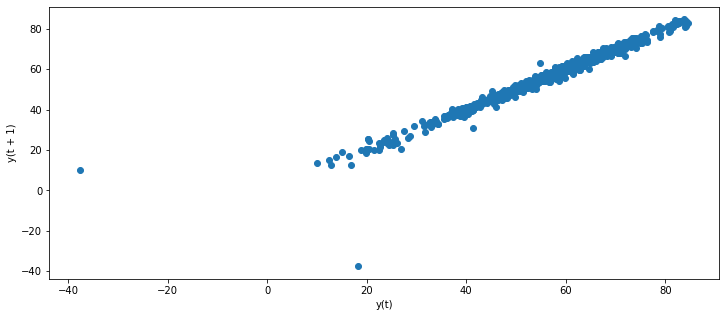

In [ ]:
from pandas.plotting import lag_plot
lag_plot(prices['Price'])
plt.show()

In [ ]:
df=pd.date_range(start="23-11-2016", end="22-11-2021").difference(prices.index)
df

DatetimeIndex(['2016-11-26', '2016-11-27', '2016-12-03', '2016-12-04',
               '2016-12-10', '2016-12-11', '2016-12-17', '2016-12-18',
               '2016-12-24', '2016-12-25',
               ...
               '2021-10-23', '2021-10-24', '2021-10-30', '2021-10-31',
               '2021-11-06', '2021-11-07', '2021-11-13', '2021-11-14',
               '2021-11-20', '2021-11-21'],
              dtype='datetime64[ns]', length=508, freq=None)

In [ ]:
s=pd.Series(df)
s.index=pd.DatetimeIndex(s.index)

In [ ]:
s = s.reindex(df, fill_value=0)

In [ ]:
frames = [prices,s]
dff = pd.concat(frames, axis=1)

In [ ]:
dff.reset_index()

,index,Price,Open,High,Low,Volume,Chg%,0
0,2016-11-23,47.96,47.94,48.43,47.40,556860.0,-0.0015,NaN
1,2016-11-24,47.98,48.03,48.26,47.80,0.0,0.0004,NaN
2,2016-11-25,46.06,47.97,48.26,45.88,465980.0,-0.0400,NaN
3,2016-11-26,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2016-11-27,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2016-11-28,47.08,45.43,47.65,45.14,734380.0,0.0221,NaN
6,2016-11-29,45.23,46.88,46.98,44.82,732820.0,-0.0393,NaN
7,2016-11-30,49.44,45.24,49.90,45.22,1310000.0,0.0931,NaN
8,2016-12-01,51.06,49.07,51.80,48.98,974810.0,0.0328,NaN
9,2016-12-02,51.68,51.01,51.73,50.18,667100.0,0.0121,NaN


In [ ]:
dff.drop(dff.iloc[:, 1:8], inplace = True, axis = 1)
  
dff.head(5)

,Price
2016-11-23,47.96
2016-11-24,47.98
2016-11-25,46.06
2016-11-26,NaN
2016-11-27,NaN


In [ ]:
prices=dff

In [ ]:
prices.isnull().sum()

Price    508
dtype: int64

In [ ]:
prices['Price'].fillna(prices['Price'].median(), inplace=True)

## Exploratory Data Analysis (EDA)

<AxesSubplot:>

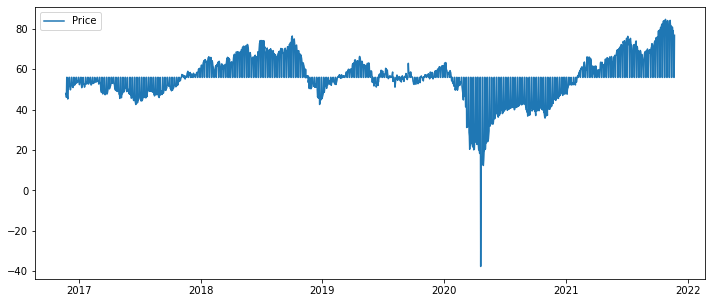

In [ ]:
#line plot for the prices
sns.lineplot(data=prices)

In [ ]:
prices_df=pd.read_excel("Historical Oil Prices.xlsx")

In [ ]:
prices_df["month"] = prices_df.Date.dt.strftime("%b") # month extraction
prices_df["year"] = prices_df.Date.dt.strftime("%Y") # year extraction

In [ ]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1318 non-null   datetime64[ns]
 1   Price   1318 non-null   float64       
 2   Open    1318 non-null   float64       
 3   High    1318 non-null   float64       
 4   Low     1318 non-null   float64       
 5   Volume  1318 non-null   object        
 6   Chg%    1318 non-null   float64       
 7   month   1318 non-null   object        
 8   year    1318 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 92.8+ KB


In [ ]:
#to change the datatype of year column in dataset
prices_df['year']=prices_df['year'].astype('int')

In [ ]:
#Grouper function to group based on Date and yearwise data
grouper = prices_df.groupby([pd.Grouper(freq='1Y',key="Date"),'month'])
d2 = grouper['Price'].mean().to_frame(name = 'mean_price').reset_index()

In [ ]:
d2["year"] = d2.Date.dt.strftime("%Y") # year extraction

In [ ]:
d2.head(5)

,Date,month,mean_price,year
0,2016-12-31,Dec,52.212273,2016
1,2016-12-31,Nov,47.291667,2016
2,2017-12-31,Apr,51.117368,2017
3,2017-12-31,Aug,48.057826,2017
4,2017-12-31,Dec,57.977619,2017


In [ ]:
prices_plot=pd.DataFrame()
prices_plot['Date']=prices_df['Date']
prices_plot['Price']=prices_df['Price']


df_year=pd.DataFrame(d2['year'])
d2.drop(['year','Date'],axis=1,inplace=True)
df_heatmap=df_year.join(d2)

In [ ]:
df_heatmap

,year,month,mean_price
0,2016,Dec,52.212273
1,2016,Nov,47.291667
2,2017,Apr,51.117368
3,2017,Aug,48.057826
4,2017,Dec,57.977619
5,2017,Feb,53.501905
6,2017,Jan,52.659565
7,2017,Jul,46.696667
8,2017,Jun,45.195909
9,2017,Mar,49.673913


In [ ]:
df_heatmap['year']=df_heatmap['year'].astype('int')

<AxesSubplot:xlabel='month', ylabel='year'>

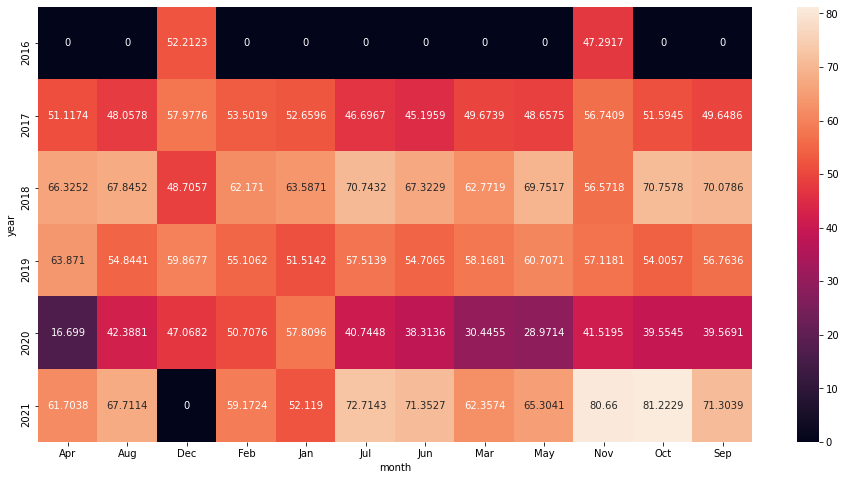

In [ ]:
#Plotting heatmap between year and month to check which month has highest price
plt.figure(figsize=(16,8))
heatmap_y_month = pd.pivot_table(data=df_heatmap,values="mean_price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

Heatmap gives us the insights that which particular month in a particular year has high oil price and vice-e-versa.The Darkest colour in map shows the least price while the lighest colour in map shows the highest price which is 81.22 rs in Oct 2021.

Text(0.5, 1.0, 'Box Plot Year Wise-Prices')

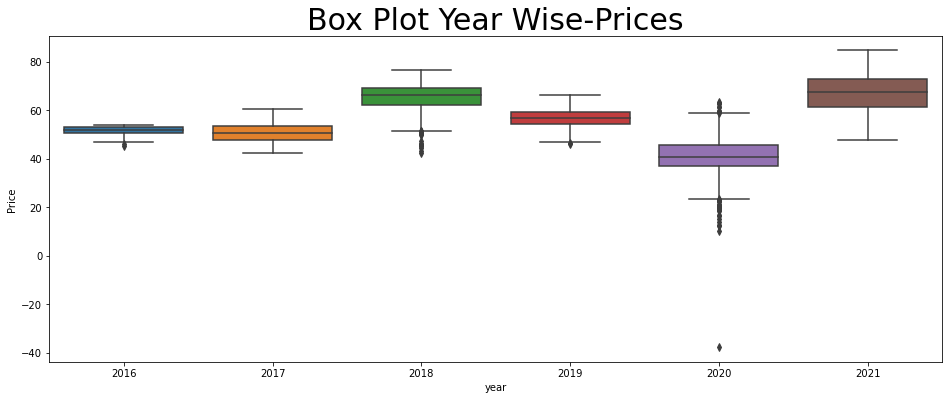

In [ ]:
#Box Plot to detect outliers
plt.figure(figsize=(16,6))
ax = sns.boxplot(x=prices_df['year'], y=prices_df['Price'])
ax.set_title('Box Plot Year Wise-Prices',fontsize=30)

-> During the years 2017, 2019, and 2020 wide variations in the values of Prices have been observed.

-> In the year 2020, which is the period of the COVID-19 Crisis, the Oil price varies between 10-65 rs.

-> Years 2016 & 2019 show litter outliers while Years 2018 & 2020 shows huge number of outliers

### Outlier Detection

In [ ]:
#Outlier Detection
Q1=np.percentile(prices["Price"],10, interpolation="midpoint")
Q3=np.percentile(prices["Price"],90, interpolation="midpoint")

In [ ]:
Q3,Q1

(68.67, 42.825)

In [ ]:
prices['Price'] = np.where((prices.Price >Q3),Q3,prices.Price)

In [ ]:
prices['Price'] = np.where((prices.Price <Q1),Q1,prices.Price)

<AxesSubplot:>

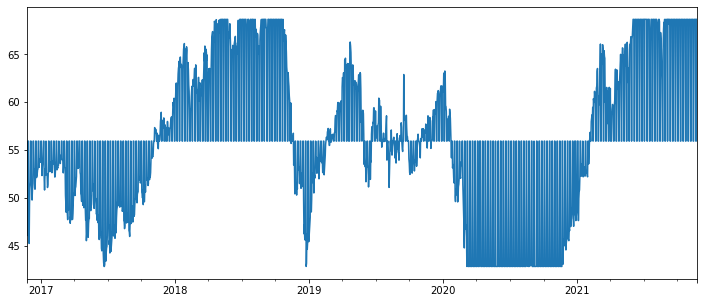

In [ ]:
prices["Price"].plot()

### Train Test Split

In [ ]:
train_size = int(len(prices) * 0.97)
train, test = prices[0:train_size], prices[train_size:]

In [ ]:
train.shape,test.shape

((1771, 1), (55, 1))

<AxesSubplot:>

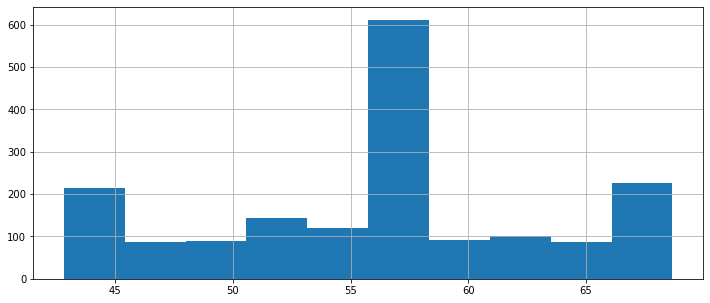

In [ ]:
train['Price'].hist()

### To Check the Stationary of Data

In [ ]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(train['Price'],autolag='AIC')

print("Result of Dickey Fuller Test")
dfoutput=pd.Series(adf_test[0:4],index=['Test Statistic','p-value','Lags Used','No of observations'])
for key,value in adf_test[4].items():
    dfoutput['Critical Value(%s)'%key]=value
    
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic           -1.513987
p-value                   0.526581
Lags Used                22.000000
No of observations     1748.000000
Critical Value(1%)       -3.434097
Critical Value(5%)       -2.863195
Critical Value(10%)      -2.567651
dtype: float64


Test Statistic is   -1.513987 is greater than any critical values. p-value is   0.526581

The p-value obtained is more than significance level of 0.05 and the ADF statistic is more than any of the critical values.

Clearly, there is reason to accept the null hypothesis. So, the time series is  not stationary.

### To make data stationary

In [ ]:
prices['30day_rolling_avg']=prices['Price'].rolling(30).mean()

<AxesSubplot:ylabel='Price'>

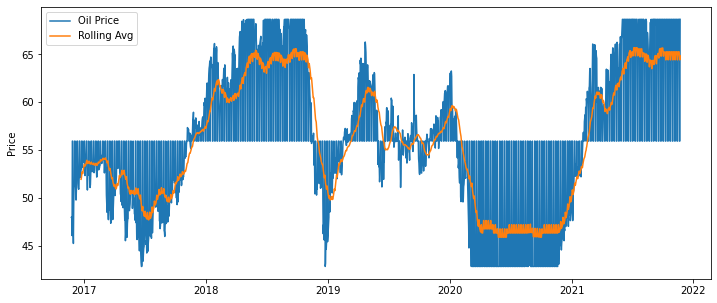

In [ ]:
sns.lineplot(data=prices['Price'],label='Oil Price')
sns.lineplot(data=prices['30day_rolling_avg'],label='Rolling Avg')

In [ ]:
rolmean=prices['Price'].rolling(window=12).mean()
rolstd=prices['Price'].rolling(window=12).std()

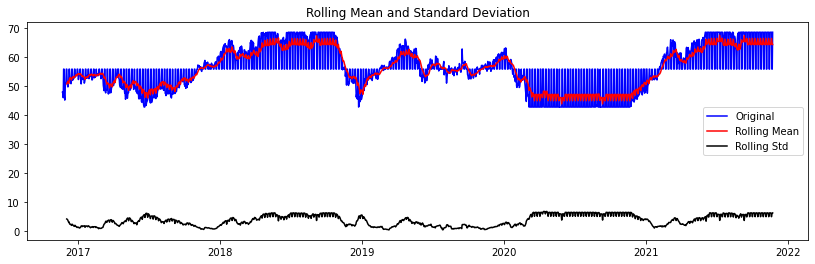

In [ ]:
plt.figure(figsize=(14,4))
orig=plt.plot(prices['Price'],color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="black",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

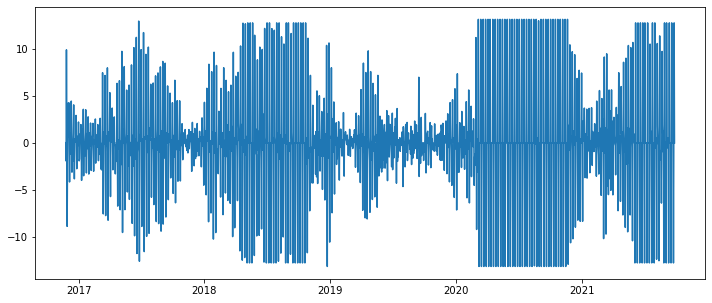

In [ ]:
DiffShifting=train['Price']-train['Price'].shift(1)
DiffShifting.dropna(inplace=True)
plt.plot(DiffShifting)

In [ ]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(DiffShifting,autolag='AIC')

print("Result of Dickey Fuller Test")
dfoutput=pd.Series(adf_test[0:4],index=['Test Statistic','p-value','Lags Used','No of observations'])
for key,value in adf_test[4].items():
    dfoutput['Critical Value(%s)'%key]=value
    
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic        -9.995020e+00
p-value                1.950556e-17
Lags Used              2.100000e+01
No of observations     1.748000e+03
Critical Value(1%)    -3.434097e+00
Critical Value(5%)    -2.863195e+00
Critical Value(10%)   -2.567651e+00
dtype: float64


Test Statistic is   -9.995020e+00 is less than any critical values. p-value is  1.950556e-17

The p-value obtained is less than significance level of 0.05 and the ADF statistic is less than any of the critical values.

Clearly, there is reason to reject the null hypothesis. So, the time series is  stationary.

<AxesSubplot:>

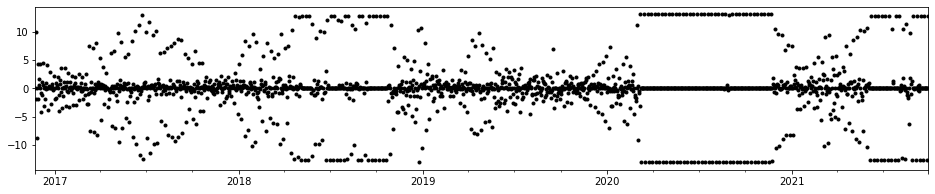

In [ ]:
#Scatterplot for prices
DiffShifting.plot(style='k.',figsize=(16,3))

<AxesSubplot:ylabel='Density'>

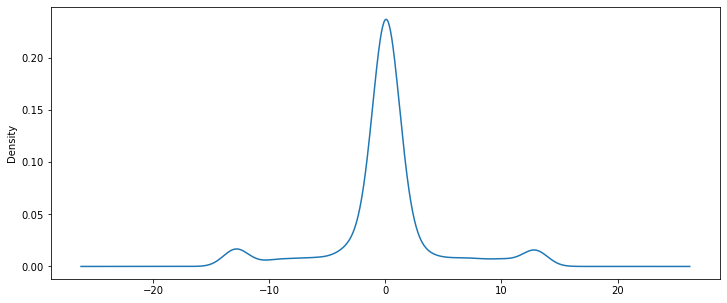

In [ ]:
#Density plot for prices to check the skewness in data
DiffShifting.plot(kind="kde")

### To Check the Seasonality, Trend and Residual

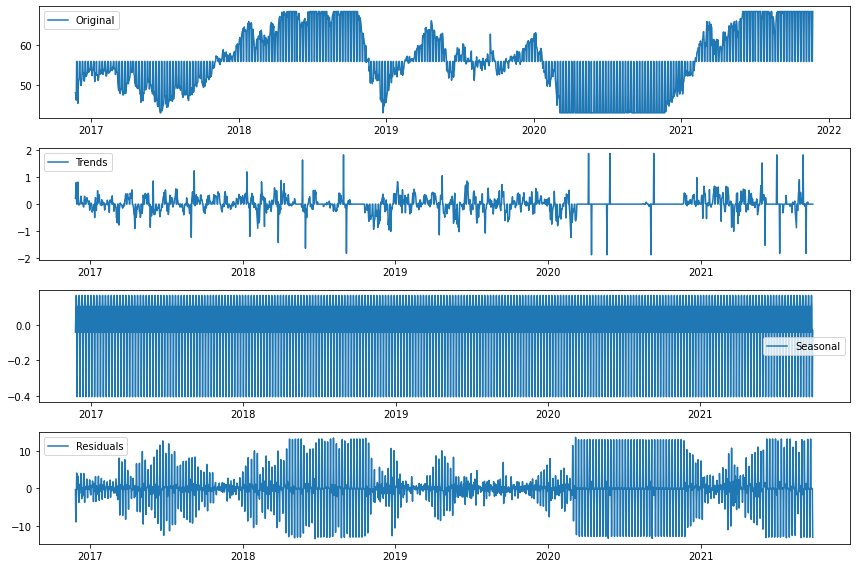

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(DiffShifting,period=7)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(prices['Price'],label='Original')
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend,label='Trends')
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc="best")
plt.tight_layout()

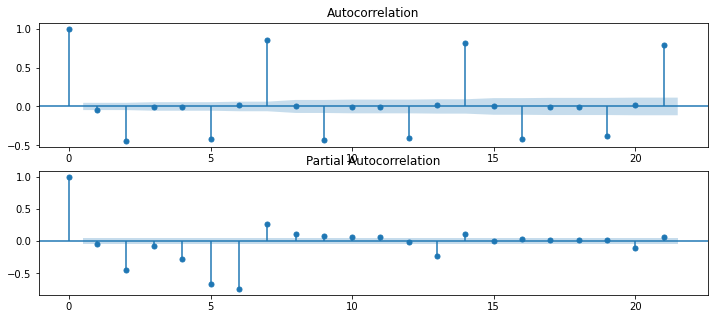

In [ ]:
#ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = plot_acf(DiffShifting,lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig=  plot_pacf(DiffShifting,lags=21,ax=ax2)
plt.show()

In [ ]:
prices.shape

(1826, 2)

In [ ]:
import itertools
p=d=q=range(0,3)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Example of parameter combination for seasonal arima')
print('SARIMAX: {} x {} '.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {} '.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX: {} x {} '.format(pdq[3],seasonal_pdq[3]))
print('SARIMAX: {} x {} '.format(pdq[4],seasonal_pdq[4]))
print('SARIMAX: {} x {} '.format(pdq[5],seasonal_pdq[5]))

Example of parameter combination for seasonal arima
SARIMAX: (0, 0, 1) x (0, 0, 1, 12) 
SARIMAX: (0, 0, 2) x (0, 0, 2, 12) 
SARIMAX: (0, 1, 0) x (0, 1, 0, 12) 
SARIMAX: (0, 1, 1) x (0, 1, 1, 12) 
SARIMAX: (0, 1, 2) x (0, 1, 2, 12) 


In [ ]:
metric_aic_dict=dict()

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(train['Price'],
                                           order=pm,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            model_aic=model.fit()
            print('ARIMA {} x {} 12- AIC:{}'.format(pm,pm_seasonal,model_aic.aic))
            metric_aic_dict.update({(pm,pm_seasonal):model_aic.aic})
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (0, 0, 1, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (0, 0, 2, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (0, 1, 0, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (0, 1, 1, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (0, 1, 2, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (0, 2, 0, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (0, 2, 1, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (0, 2, 2, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (1, 0, 0, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (1, 0, 1, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (1, 0, 2, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (1, 1, 0, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (1, 1, 1, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (1, 1, 2, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (1, 2, 0, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0) x (1, 2, 1, 12) 12- AIC:19291.19215516102
ARIMA (0, 0, 0

ARIMA (0, 1, 2) x (0, 1, 2, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (0, 2, 0, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (0, 2, 1, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (0, 2, 2, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 0, 0, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 0, 1, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 0, 2, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 1, 0, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 1, 1, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 1, 2, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 2, 0, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 2, 1, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (1, 2, 2, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (2, 0, 0, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (2, 0, 1, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (2, 0, 2, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2) x (2, 1, 0, 12) 12- AIC:9657.855272258328
ARIMA (0, 1, 2

ARIMA (1, 0, 1) x (1, 0, 1, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (1, 0, 2, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (1, 1, 0, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (1, 1, 1, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (1, 1, 2, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (1, 2, 0, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (1, 2, 1, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (1, 2, 2, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 0, 0, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 0, 1, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 0, 2, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 1, 0, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 1, 1, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 1, 2, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 2, 0, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 2, 1, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 1) x (2, 2, 2, 12) 12- AIC:10161.10502911003
ARIMA (1, 0, 2

ARIMA (1, 2, 0) x (2, 0, 1, 12) 12- AIC:11625.683349287536
ARIMA (1, 2, 0) x (2, 0, 2, 12) 12- AIC:11625.683349287536
ARIMA (1, 2, 0) x (2, 1, 0, 12) 12- AIC:11625.683349287536
ARIMA (1, 2, 0) x (2, 1, 1, 12) 12- AIC:11625.683349287536
ARIMA (1, 2, 0) x (2, 1, 2, 12) 12- AIC:11625.683349287536
ARIMA (1, 2, 0) x (2, 2, 0, 12) 12- AIC:11625.683349287536
ARIMA (1, 2, 0) x (2, 2, 1, 12) 12- AIC:11625.683349287536
ARIMA (1, 2, 0) x (2, 2, 2, 12) 12- AIC:11625.683349287536
ARIMA (1, 2, 1) x (0, 0, 0, 12) 12- AIC:10498.885100104917
ARIMA (1, 2, 1) x (0, 0, 1, 12) 12- AIC:10498.885100104917
ARIMA (1, 2, 1) x (0, 0, 2, 12) 12- AIC:10498.885100104917
ARIMA (1, 2, 1) x (0, 1, 0, 12) 12- AIC:10498.885100104917
ARIMA (1, 2, 1) x (0, 1, 1, 12) 12- AIC:10498.885100104917
ARIMA (1, 2, 1) x (0, 1, 2, 12) 12- AIC:10498.885100104917
ARIMA (1, 2, 1) x (0, 2, 0, 12) 12- AIC:10498.885100104917
ARIMA (1, 2, 1) x (0, 2, 1, 12) 12- AIC:10498.885100104917
ARIMA (1, 2, 1) x (0, 2, 2, 12) 12- AIC:10498.8851001049

ARIMA (2, 0, 2) x (2, 2, 1, 12) 12- AIC:9669.508579426747
ARIMA (2, 0, 2) x (2, 2, 2, 12) 12- AIC:9669.508579426747
ARIMA (2, 1, 0) x (0, 0, 0, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (0, 0, 1, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (0, 0, 2, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (0, 1, 0, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (0, 1, 1, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (0, 1, 2, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (0, 2, 0, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (0, 2, 1, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (0, 2, 2, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (1, 0, 0, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (1, 0, 1, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (1, 0, 2, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (1, 1, 0, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (1, 1, 1, 12) 12- AIC:10106.414164620954
ARIMA (2, 1, 0) x (1, 1, 2, 12) 12- AIC:10106.414164620954

ARIMA (2, 2, 2) x (0, 1, 2, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (0, 2, 0, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (0, 2, 1, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (0, 2, 2, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 0, 0, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 0, 1, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 0, 2, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 1, 0, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 1, 1, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 1, 2, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 2, 0, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 2, 1, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (1, 2, 2, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (2, 0, 0, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (2, 0, 1, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (2, 0, 2, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2) x (2, 1, 0, 12) 12- AIC:9580.409974414772
ARIMA (2, 2, 2

In [ ]:
{k:v for k,v in sorted(metric_aic_dict.items(),key=lambda x:x[1])}

{((2, 1, 2), (0, 0, 0, 12)): 9579.14436232313,
 ((2, 1, 2), (0, 0, 1, 12)): 9579.14436232313,
 ((2, 1, 2), (0, 0, 2, 12)): 9579.14436232313,
 ((2, 1, 2), (0, 1, 0, 12)): 9579.14436232313,
 ((2, 1, 2), (0, 1, 1, 12)): 9579.14436232313,
 ((2, 1, 2), (0, 1, 2, 12)): 9579.14436232313,
 ((2, 1, 2), (0, 2, 0, 12)): 9579.14436232313,
 ((2, 1, 2), (0, 2, 1, 12)): 9579.14436232313,
 ((2, 1, 2), (0, 2, 2, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 0, 0, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 0, 1, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 0, 2, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 1, 0, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 1, 1, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 1, 2, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 2, 0, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 2, 1, 12)): 9579.14436232313,
 ((2, 1, 2), (1, 2, 2, 12)): 9579.14436232313,
 ((2, 1, 2), (2, 0, 0, 12)): 9579.14436232313,
 ((2, 1, 2), (2, 0, 1, 12)): 9579.14436232313,
 ((2, 1, 2), (2, 0, 2, 12)): 9579.14436232313,
 ((2, 1, 2), 

In [ ]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(train['Price'],
                                order=(4,1,4),
                                seasonal_order=(4,2,4,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_aic=model.fit()

In [ ]:
print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7874      0.009     88.067      0.000       0.770       0.805
ar.L2         -1.4168      0.010   -139.965      0.000      -1.437      -1.397
ar.L3          0.7823      0.009     90.086      0.000       0.765       0.799
ar.L4         -0.9648      0.008   -117.563      0.000      -0.981      -0.949
ma.L1         -1.3101      0.020    -66.908      0.000      -1.349      -1.272
ma.L2          1.3839      0.035     39.150      0.000       1.315       1.453
ma.L3         -0.9949      0.035    -28.262      0.000      -1.064      -0.926
ma.L4          0.5566      0.026     21.630      0.000       0.506       0.607
ar.S.L12      -1.0608      0.065    -16.360      0.000      -1.188      -0.934
ar.S.L24      -0.5444      0.063     -8.645      0.000      -0.668      -0.421
ar.S.L36       0.1533      0.048      3.211      0.0

In [ ]:
model_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1771
Model:             SARIMAX(4, 1, 4)x(4, 2, 4, 12)   Log Likelihood               -3814.295
Date:                            Tue, 04 Jan 2022   AIC                           7662.590
Time:                                    22:27:45   BIC                           7754.972
Sample:                                11-23-2016   HQIC                          7696.797
                                     - 09-28-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7874      0.009     88.067      0.000       0.770       0.805
ar.L2         -1.4168      0.010   -139.965      0.000      -1.437      -1.397
ar.L3          0.7823      0.009     90.086      0.000       0.765       0.799
ar.L4         -0.9648      0.008   -117.563      0.000      -0.981      -0.949
ma.L1         -1.3101      0.020    -66.908      0.000      -1.349      -1.272
ma.L2          1.3839      0.035     39.150      0.000       1.315       1.453
ma.L3         -0.9949      0.035    -28.262      0.000      -1.064      -0.926
ma.L4          0.5566      0.026     21.630      0.000       0.506       0.607
ar.S.L12      -1.0608      0.065    -16.360      0.000      -1.188      -0.934
ar.S.L24      -0.5444      0.063     -8.645      0.000      -0.668      -0.421
ar.S.L36       0.1533      0.048      3.211      0.001       0.060       0.247
ar.S.L48      -0.1022      0.029     -3.467      0.001      -0.160      -0.044
ma.S.L12      -0.5992      0.067     -8.914      0.000      -0.731      -0.467
ma.S.L24      -0.8715      0.093     -9.382      0.000      -1.054      -0.689
ma.S.L36      -0.4141      0.075     -5.553      0.000      -0.560      -0.268
ma.S.L48       0.8880      0.055     16.130      0.000       0.780       0.996
sigma2         5.2333      0.192     27.243      0.000       4.857       5.610
===================================================================================
Ljung-Box (L1) (Q):                  78.08   Jarque-Bera (JB):              1521.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train.index

DatetimeIndex(['2016-11-23', '2016-11-24', '2016-11-25', '2016-11-26',
               '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30',
               '2016-12-01', '2016-12-02',
               ...
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26',
               '2021-09-27', '2021-09-28'],
              dtype='datetime64[ns]', length=1771, freq='D')

In [ ]:
predict_train = model_aic.predict(start=pd.to_datetime('2016-11-23'),end=pd.to_datetime('2021-09-28'))

<AxesSubplot:>

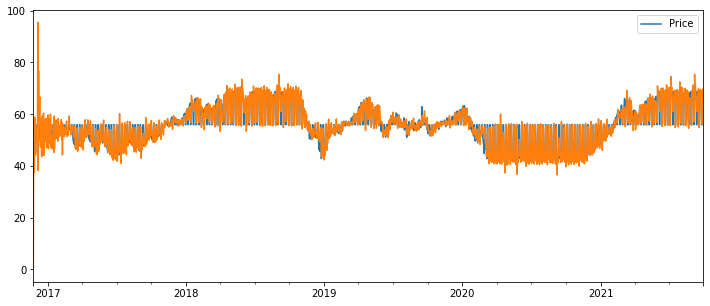

In [ ]:
train.plot()
predict_train.plot()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(train,predict_train)

0.033966544357708406

In [ ]:
test.index

DatetimeIndex(['2021-09-29', '2021-09-30', '2021-10-01', '2021-10-02',
               '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10',
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-20', '2021-11-21', '2021-11-22'],
              dtype

In [ ]:
predict_test = model_aic.predict(start=pd.to_datetime('2021-09-29'),end=pd.to_datetime('2021-11-22'))

In [ ]:
mean_absolute_percentage_error(test,predict_test)

0.026637215924090425

<AxesSubplot:>

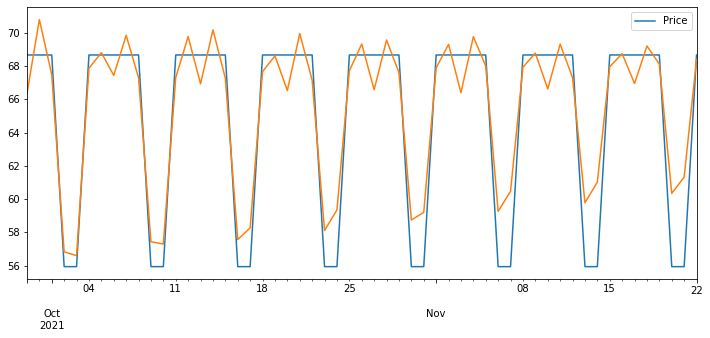

In [ ]:
test.plot()
predict_test.plot()

In [ ]:
forecast = model_aic.predict(start=pd.to_datetime('2021-11-23'),end=pd.to_datetime('2021-12-14'))

<AxesSubplot:>

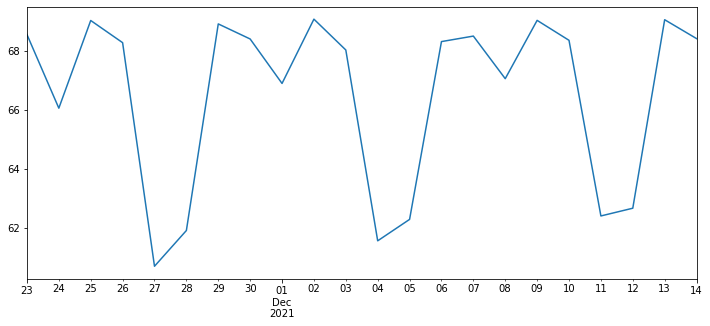

In [ ]:
forecast.plot()

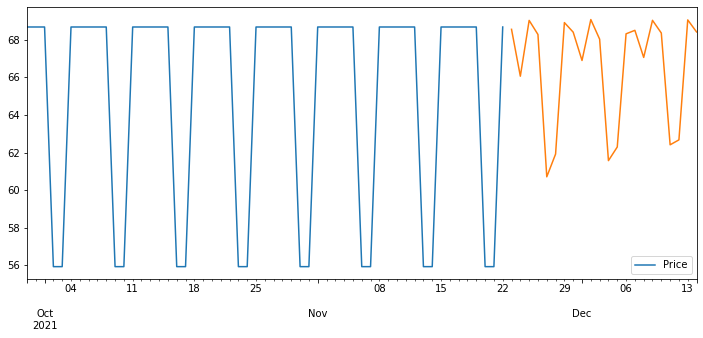

In [ ]:
test.plot()
forecast.plot()
plt.show()

In [ ]:
import pickle
with open("model_f_pickle", "wb") as f:
    pickle.dump(model_aic,f)

In [ ]:
with open("model_f_pickle", "rb") as f:
    mp=pickle.load(f)

In [ ]:
mp.forecast(steps=15)

2021-09-29    66.341374
2021-09-30    70.800762
2021-10-01    67.488016
2021-10-02    56.825561
2021-10-03    56.598318
2021-10-04    67.872597
2021-10-05    68.809396
2021-10-06    67.441682
2021-10-07    69.852335
2021-10-08    67.304813
2021-10-09    57.435176
2021-10-10    57.296417
2021-10-11    67.317016
2021-10-12    69.773358
2021-10-13    66.933550
Freq: D, Name: predicted_mean, dtype: float64